In [1]:
import mne
import numpy as np
import matplotlib.pyplot as plt

# Import the FOOOF object
from fooof import FOOOF
from fooof import FOOOFGroup
# Import a utility to download and load example data
from fooof.utils.download import load_fooof_data


EEG = mne.read_epochs_eeglab('/home/b1044271/Columbia/Test_dataset.set')
EEG1 = EEG.pick('E257', exclude=[]) # select Cz for further analysis

In [2]:
EEG = mne.read_epochs_eeglab('/home/b1044271/Columbia/Test_dataset.set')
EEG1 = EEG.pick('E257', exclude=[]) # select Cz for further analysis

/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Extracting parameters from /home/b1044271/Columbia/Test_dataset.set...


/tmp/ipykernel_1969512/1325039894.py:1: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab('/home/b1044271/Columbia/Test_dataset.set')


Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Ready.


In [2]:
EEG2 = EEG.pick(['E1','E2','E257'], exclude=[]) # select Cz for further analysis


NameError: name 'EEG' is not defined

Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)


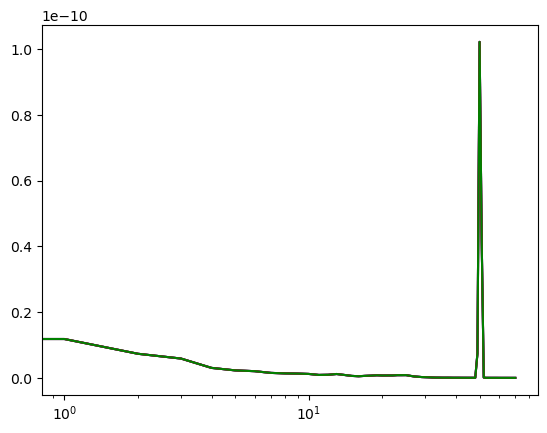

In [8]:
fs=250
%matplotlib inline

TF_N1a = N1.compute_psd(method='welch', average = 'mean', fmin = 0.5, fmax = 70, n_per_seg = 2*fs)

TF_N1b = N1.compute_psd(method='welch', average = 'mean', fmin = 0.5, fmax = 70, n_per_seg = 5*fs)

TF_N1c = N1.compute_psd(method='welch', average = 'mean', fmin = 0.5, fmax = 70, n_per_seg = 10*fs)

TF_N1d = N1.compute_psd(method='welch', average = 'mean', fmin = 0.5, fmax = 70, n_per_seg = 15*fs)

fig, ax = plt.subplots()
ax.plot(np.mean(np.squeeze(TF_N1a),0), color = 'black')
ax.plot(np.mean(np.squeeze(TF_N1b),0), color = 'blue')
ax.plot(np.mean(np.squeeze(TF_N1c),0), color = 'red')
ax.plot(np.mean(np.squeeze(TF_N1d),0), color = 'green')
plt.xscale("log")
plt.show()

In [3]:
# Settings for PSD calculation using welch's
fs = 250
SETTINGS_B = { 'method' : 'welch', 'average' : 'mean', 'fmin' :1 }
N1 = EEG1['stage_1']
N2 = EEG1['stage_2']
N3 = EEG1['stage_3']
RE = EEG1['stage_5']
AW = EEG1['stage_0']
N1p={}
N2p={}
N3p={}
AWp={}
RMp={}

X={}
X1={}
X2={}
X4={}
X5={}

Time_segments = [500, 1250, 2500, 3750] 
f_max = [30, 45 , 55, 70, 100]

i = 0
for x in Time_segments:
    for y in f_max:
        i = i+1
        X[i]  = N1.compute_psd(**SETTINGS_B, fmax =y, n_fft=x)
        X1[i] = N2.compute_psd(**SETTINGS_B, fmax =y, n_fft=x)
        X2[i] = N3.compute_psd(**SETTINGS_B, fmax =y, n_fft=x)
        X4[i] = AW.compute_psd(**SETTINGS_B, fmax =y, n_fft=x)
        X5[i] = RE.compute_psd(**SETTINGS_B, fmax =y, n_fft=x)

        N1p[x] = X[x]._data
        N2p[x] = X1[x]._data
        N3p[x] = X2[x]._data
        AWp[x] = X4[x]._data
        RMp[x] = X5[x]._data

Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)


KeyError: 500

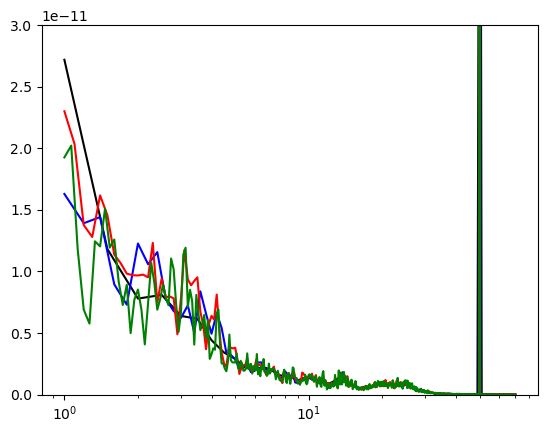

In [112]:
fig, ax = plt.subplots()
ax.plot(TF_Wa._freqs, np.mean(np.squeeze(TF_N1a),0), color = 'black')
ax.plot(TF_Wb._freqs, np.mean(np.squeeze(TF_N1b),0), color = 'blue')
ax.plot(TF_Wc._freqs, np.mean(np.squeeze(TF_N1c),0), color = 'red')
ax.plot(TF_Wd._freqs, np.mean(np.squeeze(TF_N1d),0), color = 'green')
plt.xscale("log")
plt.ylim(0, 0.03e-9)
plt.show()

In [10]:
fooof_outputs = {} 
fooof_outputs={}
SETTINGS_F={}
freq_range = [TF_N1a._freqs[0] , TF_N1a._freqs[-1]]
variables = [X, X]

i = 0
for A in variables:
    for keys, values in A.items(): 
        print(values)
        fm = FOOOF(**SETTINGS_F)
        fm.fit(X[keys]._freqs, np.mean(np.squeeze(X[keys]._data),0), freq_range)
        fm.print_results()
        i=i+1
    #fm.save()
    
    fooof_outputs[i] = fm.get_results()

<Power Spectrum (from Epochs, welch method) | 14 epochs × 1 channels × 59 freqs, 1.0-30.0 Hz>

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 1 - 30 Hz                        
                                 Frequency Resolution is 0.50 Hz                                  
                                                           

In [23]:
#Now we select epochs and average over all epochs
N1s = EEG1['stage_1']
N2s = EEG1['stage_2']
N3s = EEG1['stage_3']
REs = EEG1['stage_5']
AWs = EEG1['stage_0']
Time_segments = [2, 5, 10, 15] #in seconds
f_max = [30, 45 , 55, 70, 100]

    # Frequency transformation welch's method from 1 to 70Hz
N1={}
N2={}
N3={}
AW={}
RM={}

i = 0
for x in Time_segments:
    for y in f_max:
        N1[i] = N1s.compute_psd(**SETTINGS_B, fmax=y, n_fft=fs*x) #N1
        N2[i] = N2s.compute_psd(**SETTINGS_B, fmax=y, n_fft=fs*x) #N2
        N3[i] = N3s.compute_psd(**SETTINGS_B, fmax=y, n_fft=fs*x)
        AW[i] = AWs.compute_psd(**SETTINGS_B, fmax=y, n_fft=fs*x)
        RM[i] = REs.compute_psd(**SETTINGS_B, fmax=y, n_fft=fs*x)
        i = i+1

# model fit on different freq characteristics
SETTINGS_F1={'max_n_peaks':8, 'aperiodic_mode':'fixed'}
SETTINGS_F2={'max_n_peaks':8, 'aperiodic_mode':'knee'}
freq_range = [N1[2]._freqs[0] , N1[2]._freqs[-1]]

fooof_a = {}
fooof_b = {}

i = 0
variables = [N1, N2, N3, AW, RM]
for  A in variables:
    for keys, values in A.items(): 
        fm1 = FOOOF(**SETTINGS_F1)
        fm1.fit(A[keys]._freqs, np.mean(np.squeeze(A[keys]._data),0), freq_range)
        fooof_a[i] = fm1.get_results()

        fm2 = FOOOF(**SETTINGS_F2)
        fm2.fit(A[keys]._freqs, np.mean(np.squeeze(A[keys]._data),0), freq_range)
        fooof_b[i] = fm2.get_results()

        i=i+1

Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective wind

In [62]:
i = 0
for x in Time_segments:
    for y in f_max:
        N1[i] = N1s.compute_psd(**SETTINGS_B, fmax=y, n_fft=fs*x) #N1
        N2[i] = N2s.compute_psd(**SETTINGS_B, fmax=y, n_fft=fs*x) #N2
        N3[i] = N3s.compute_psd(**SETTINGS_B, fmax=y, n_fft=fs*x)
        AW[i] = AWs.compute_psd(**SETTINGS_B, fmax=y, n_fft=fs*x)
        RM[i] = REs.compute_psd(**SETTINGS_B, fmax=y, n_fft=fs*x)
        i = i+1

Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective wind

In [66]:
np.mean(np.squeeze(N1[1]._data),0)

array([2.71813273e-11, 1.18163073e-11, 7.79819924e-12, 8.10072068e-12,
       6.39170782e-12, 6.16132982e-12, 4.41971899e-12, 3.42226051e-12,
       2.90251068e-12, 2.19069858e-12, 2.09057245e-12, 2.23797482e-12,
       2.03501815e-12, 1.59463916e-12, 1.50942390e-12, 1.41294360e-12,
       1.15395356e-12, 1.33826424e-12, 1.43037385e-12, 1.34022680e-12,
       1.12101710e-12, 9.88504219e-13, 8.66441895e-13, 1.02521956e-12,
       1.24455668e-12, 1.48928211e-12, 1.41772340e-12, 9.71019335e-13,
       8.18882178e-13, 7.24011005e-13, 5.54886820e-13, 5.78623471e-13,
       6.51032919e-13, 6.40812416e-13, 7.03585954e-13, 7.76131988e-13,
       8.35609453e-13, 8.65958677e-13, 7.98853034e-13, 9.14864450e-13,
       8.35517223e-13, 8.88647103e-13, 8.91855541e-13, 7.78508264e-13,
       9.37854270e-13, 9.16091939e-13, 9.29345290e-13, 8.90840121e-13,
       8.60255762e-13, 8.80737630e-13, 6.94743654e-13, 5.58593699e-13,
       5.00195411e-13, 4.16412581e-13, 3.42716072e-13, 3.46643261e-13,
      

In [61]:
#Now we select epochs and average over all epochs
N1s = EEG2['stage_1']
N2s = EEG2['stage_2']
N3s = EEG2['stage_3']
REs = EEG2['stage_5']
AWs = EEG2['stage_0']
Time_segments = [2, 5, 10, 15] #in seconds
f_max = [30, 45 , 55, 70, 100]

    # Frequency transformation welch's method from 1 to 70Hz
N1={}
N2={}
N3={}
AW={}
RM={}

i = 0
for x in Time_segments:
    for y in f_max:
        print(y)
        N1[i] = N1s.compute_psd(**SETTINGS_B, fmax=y, n_fft=fs*x) #N1
        N2[i] = N2s.compute_psd(**SETTINGS_B, fmax=y, n_fft=fs*x) #N2
        N3[i] = N3s.compute_psd(**SETTINGS_B, fmax=y, n_fft=fs*x)
        AW[i] = AWs.compute_psd(**SETTINGS_B, fmax=y, n_fft=fs*x)
        RM[i] = REs.compute_psd(**SETTINGS_B, fmax=y, n_fft=fs*x)
        i = i+1



30
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
45
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
55
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
70
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
100
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
30
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000

In [1]:
N1[8]._data

NameError: name 'N1' is not defined

In [101]:
# model fit on different freq characteristics
SETTINGS_F1={'max_n_peaks':8, 'aperiodic_mode':'fixed'}
SETTINGS_F2={'max_n_peaks':8, 'aperiodic_mode':'knee'}
freq_range = [N1[2]._freqs[0] , N1[2]._freqs[-1]]

fooof_a = {}
fooof_b = {}

i = 0
variables = [N1, N2, N3, AW, RM]
for  A in variables:
    for keys, values in A.items(): 
        fm1 = FOOOF(**SETTINGS_F1)
        fm1.fit(A[keys]._freqs, np.mean(np.squeeze(A[keys]._data),0), [A[keys]._freqs[0] , A[keys]._freqs[-1]])
        fooof_a[i] = fm1.get_results()

        fm2 = FOOOF(**SETTINGS_F2)
        fm2.fit(A[keys]._freqs, np.mean(np.squeeze(A[keys]._data),0), [A[keys]._freqs[0] , A[keys]._freqs[-1]])
        fooof_b[i] = fm2.get_results()

        i=i+1


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a low

In [100]:
len(fooof_a)


100

In [102]:
import xlsxwriter

# Create an new Excel file and add a worksheet.
workbook = xlsxwriter.Workbook('Parametres_index.xlsx')
worksheet = workbook.add_worksheet()

data_cols = ['ID', 'Stage','Time Steps(s)', 'freq_upper_lim','Knee', 'Rsquared', 'Error', 'Offset', 'Exponent', 'Number of Peaks']
header_format = workbook.add_format({
    'bold': False,
    'font_name': 'Arial',
    'font_size': 10,
    'text_wrap': True,
    'center_across': True,
    'valign': 'bottom',
    'fg_color': '#cdffff',
    'border': 1})

for col_num, value in enumerate(data_cols):
    worksheet.write(0, col_num, value, header_format)
 
i=1
ii = 0
timesteps = ["2","5","10","15"]*5
freq_lims = f_max*20
stages = np.repeat(np.array(["N1", "N2", "N3","R","W"]), 20, axis=0)
timesteps2 = np.repeat(["2","5","10","15"]*5, 5, axis = 0)
for key , value in fooof_a.items():
    
    worksheet.write(i, 0, 1)  
    worksheet.write(i, 4, "N")   
    worksheet.write(i, 1, stages[ii])
    worksheet.write(i, 2, timesteps2[ii])
    worksheet.write(i, 3, freq_lims[ii])   
    worksheet.write(i, 5, fooof_a[key].r_squared)     # Writes an int
    worksheet.write(i, 6, fooof_a[key].error)     # Writes an int
    worksheet.write(i, 7, fooof_a[key].aperiodic_params[0])   
    worksheet.write(i, 8, fooof_a[key].aperiodic_params[1])     # Writes an int
    worksheet.write(i, 9, len(fooof_a[key].peak_params))     # Writes an int
    i=i+1
    ii = ii+1
    
iii = i +1
ii = 0
for key , value in fooof_b.items():
    
    worksheet.write(iii, 0, 1)  
    worksheet.write(iii, 4, "Y")   
    worksheet.write(iii, 1, stages[ii])
    worksheet.write(iii, 2, timesteps2[ii])
    worksheet.write(iii, 3, freq_lims[ii])   
    worksheet.write(iii, 5, fooof_b[key].r_squared)     # Writes an int
    worksheet.write(iii, 6, fooof_b[key].error)     # Writes an int
    worksheet.write(iii, 7, fooof_b[key].aperiodic_params[0])   
    worksheet.write(iii, 8, fooof_b[key].aperiodic_params[2])     # Writes an int
    worksheet.write(iii, 9, len(fooof_b[key].peak_params))     # Writes an int
    iii = iii +1
    ii = ii+1
workbook.close()

In [80]:
fooof_a[3].aperiodic_params

array([-10.03976154,   1.88777467])

In [17]:
stages = np.repeat(np.array(["N1", "N2", "N3","R","W"]), 4, axis=0)
stages[0]

'N1'

In [73]:
A.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [36]:
key = 1
fooof_a[key]
len(fooof_a[key].peak_params)

4

In [22]:
workbook = xlsxwriter.Workbook('/home/b1044271/Columbia/Parametres_index.xlsx')


In [19]:
get_results?

Object `get_results` not found.


In [17]:
fooof_b.values()
fooof_b.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [8]:
fooof_a

{0: FOOOFResults(aperiodic_params=array([-10.19109886,   1.96246488]), peak_params=array([[23.05755045,  0.84986321, 12.        ],
        [50.01968743,  4.29948653,  0.99874938]]), r_squared=0.9772941781912821, error=0.08665296125945296, gaussian_params=array([[23.05755045,  0.84990231,  6.        ],
        [50.01968743,  4.30279351,  0.49937469]])),
 1: FOOOFResults(aperiodic_params=array([-10.25130566,   1.92345025]), peak_params=array([[12.73151585,  0.38052783,  6.38377863],
        [19.59945424,  0.6789949 ,  2.08479047],
        [24.68825817,  0.78790793, 10.22347096],
        [50.02816435,  4.32462197,  0.5       ]]), r_squared=0.9836761905653513, error=0.07437357479579557, gaussian_params=array([[12.73151585,  0.32789769,  3.19188932],
        [19.59945424,  0.16666059,  1.04239523],
        [24.68825817,  0.78769746,  5.11173548],
        [50.02816435,  4.35214886,  0.25      ]])),
 2: FOOOFResults(aperiodic_params=array([-10.21531525,   1.95368299]), peak_params=array([[12.

In [76]:
fooof_a.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 1 - 70 Hz                        
                                 Frequency Resolution is 0.50 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offs

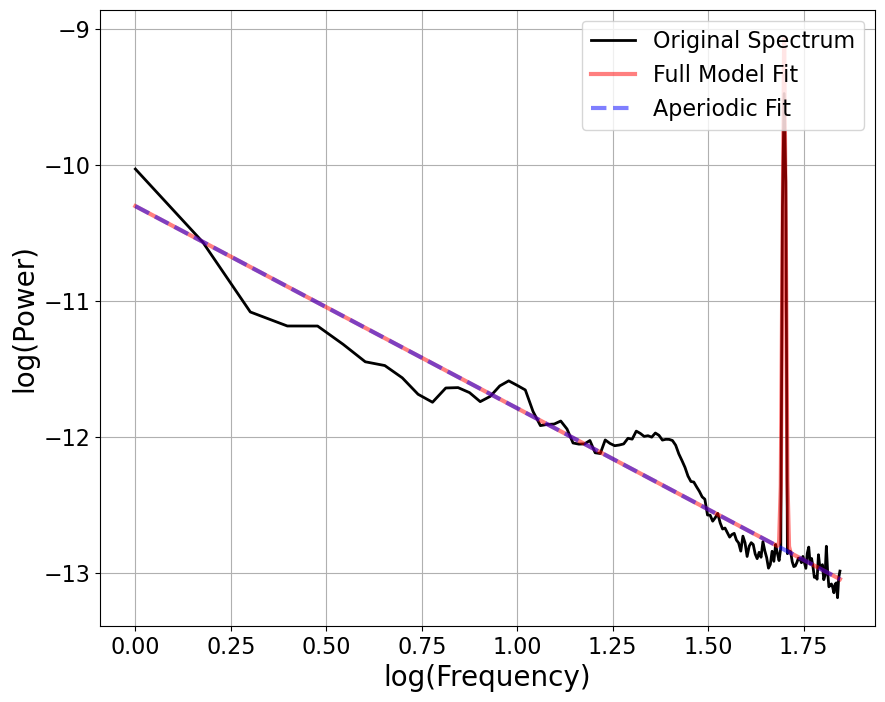

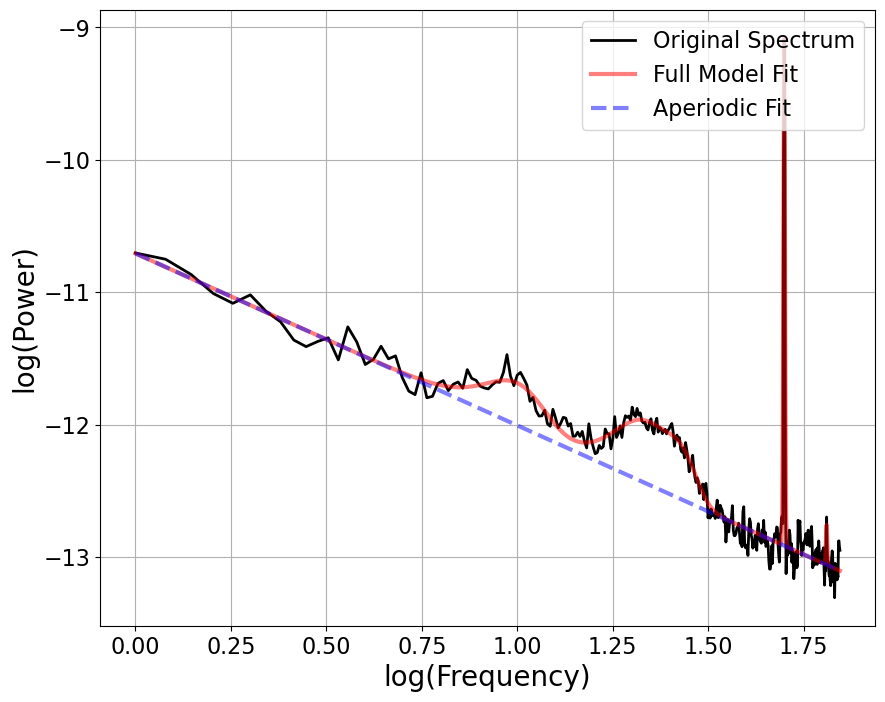

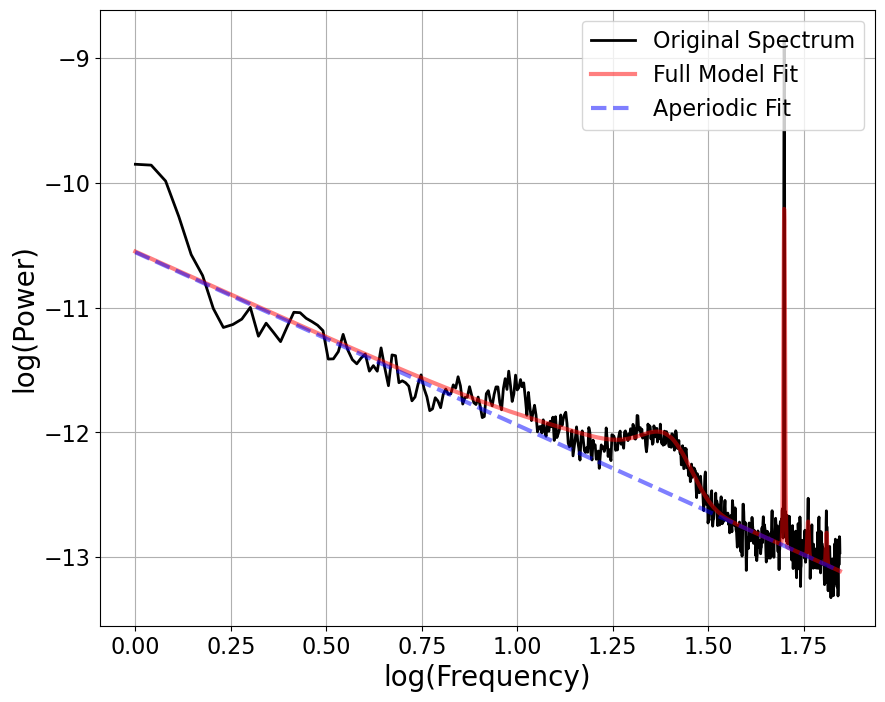

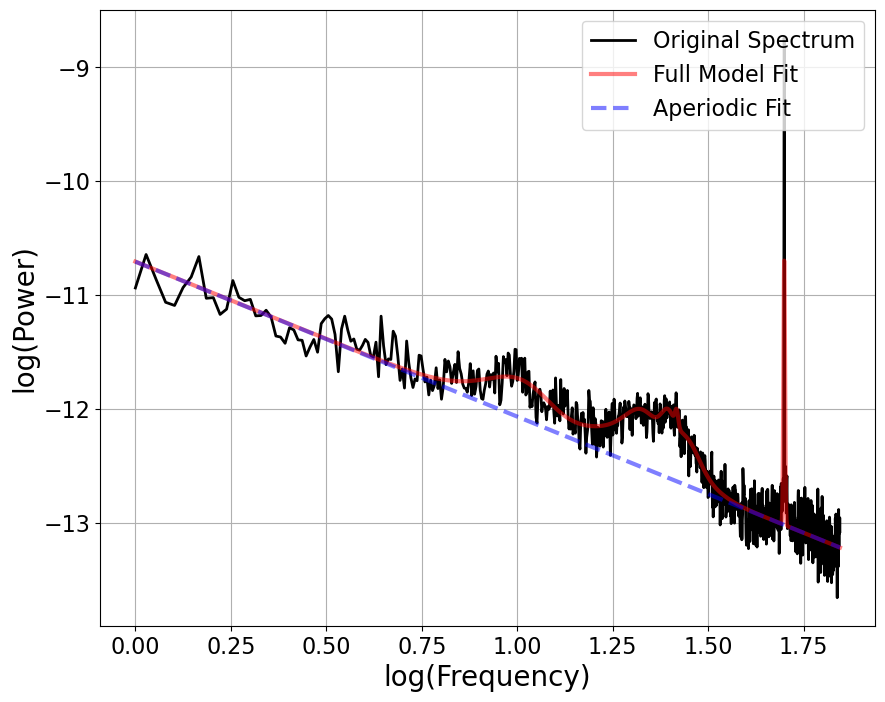

In [63]:
plt_log=True

fm = FOOOF()
fm2 = FOOOF()
fm3 = FOOOF()
fm4 = FOOOF()

freq_range = [TF_N1a._freqs[0] , TF_N1a._freqs[-1]]
# Report: fit the model, print the resulting parameters, and plot the reconstruction
X = np.mean(np.squeeze(TF_Wa._data),0)
X2 = np.mean(np.squeeze(TF_Wb._data),0)
X3 = np.mean(np.squeeze(TF_Wc._data),0)
X4 = np.mean(np.squeeze(TF_Wd._data),0)

fm.report(TF_Wa._freqs, X, freq_range, plt_log=plt_log)
fm2.report(TF_Wb._freqs, X2, freq_range, plt_log=plt_log)
fm3.report(TF_Wc._freqs, X3, freq_range, plt_log=plt_log)
fm4.report(TF_Wd._freqs, X4, freq_range, plt_log=plt_log)

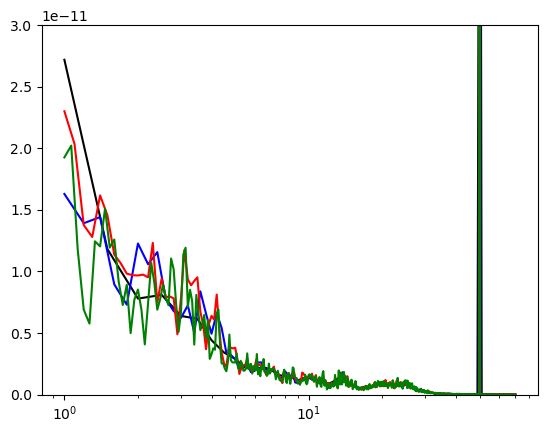

In [75]:
fig, ax = plt.subplots()
ax.plot(TF_N1a._freqs, np.mean(np.squeeze(TF_N1a),0), color = 'black')
ax.plot(TF_N1b._freqs, np.mean(np.squeeze(TF_N1b),0), color = 'blue')
ax.plot(TF_N1c._freqs, np.mean(np.squeeze(TF_N1c),0), color = 'red')
ax.plot(TF_N1d._freqs, np.mean(np.squeeze(TF_N1d),0), color = 'green')
plt.xscale("log")
plt.ylim(0, 0.03e-9)
plt.show()


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 1 - 70 Hz                        
                                 Frequency Resolution is 0.50 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offs

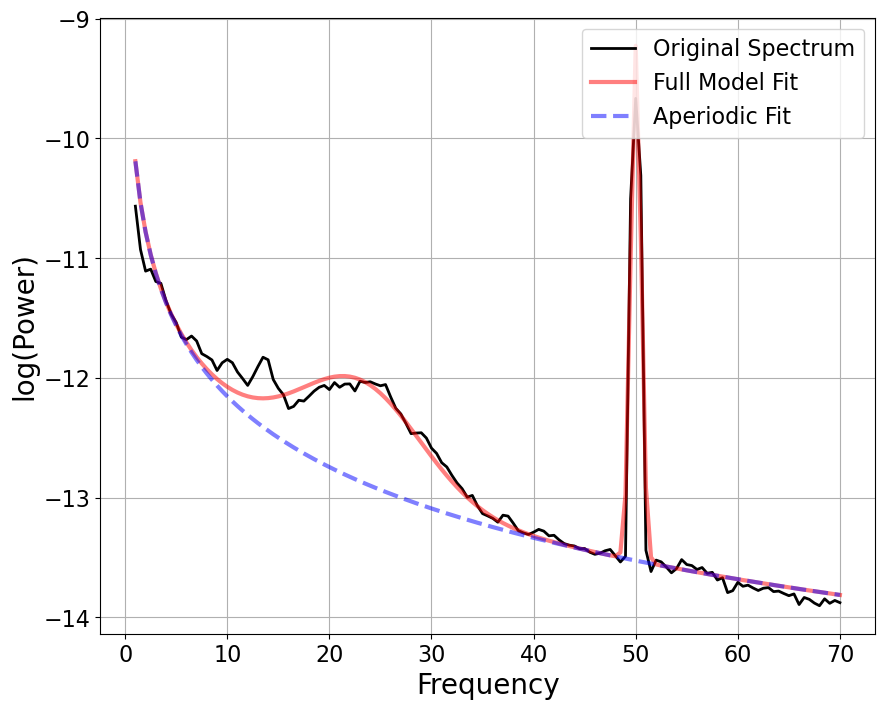

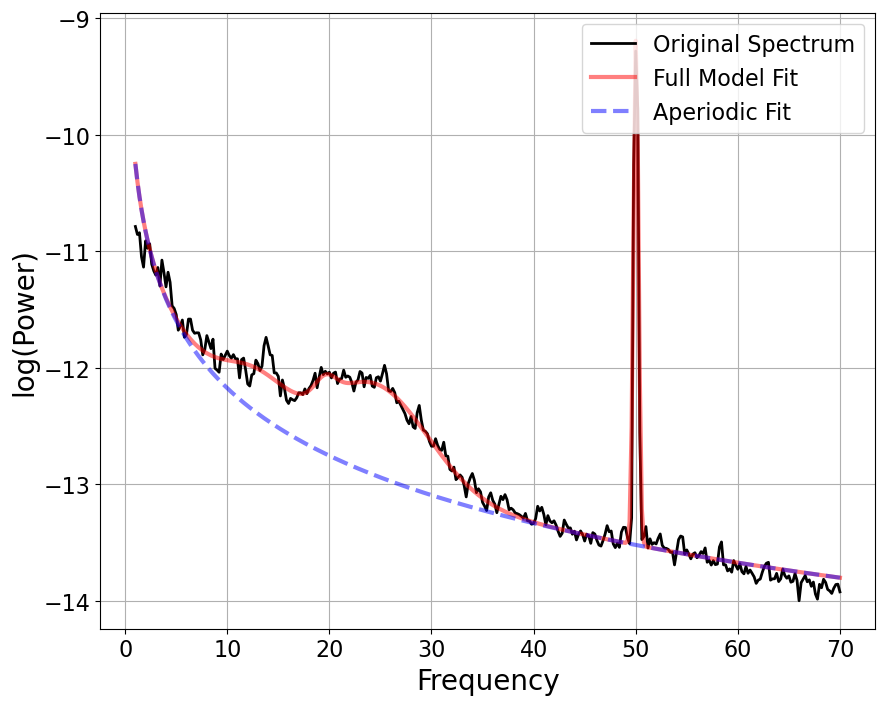

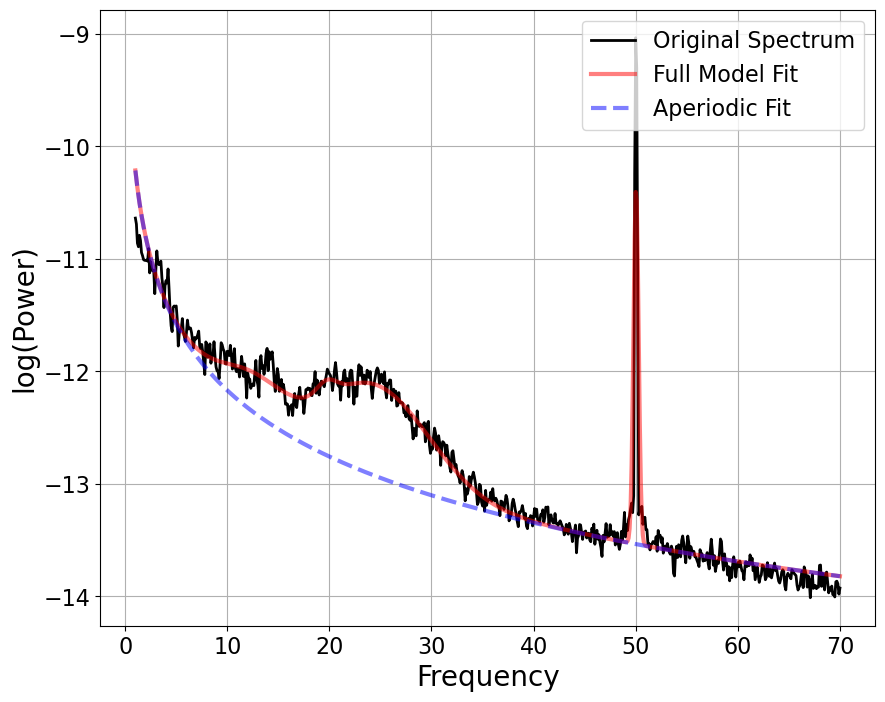

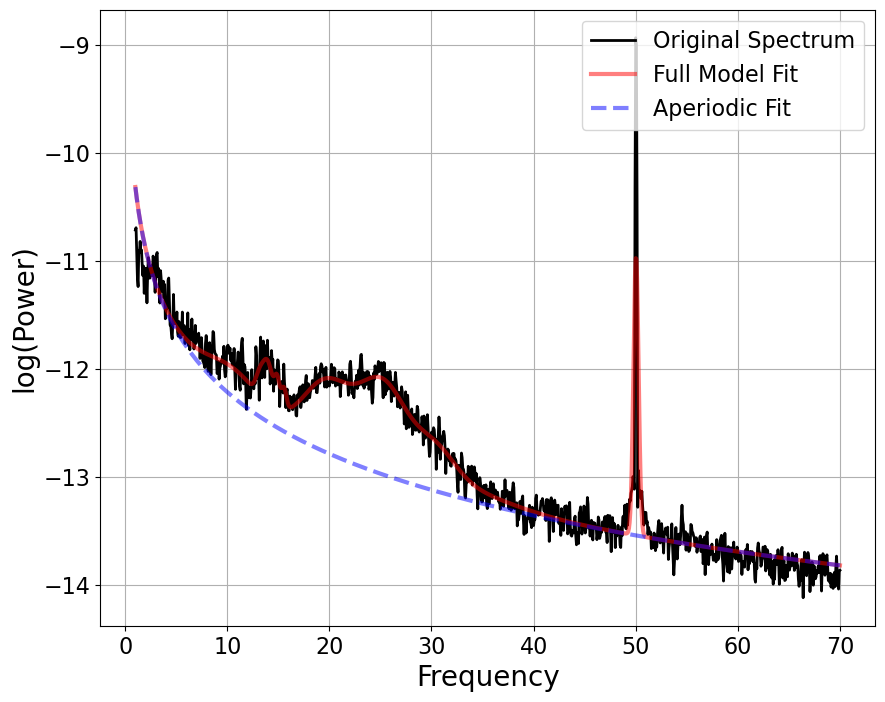

In [94]:
fm = FOOOF()
fm2 = FOOOF()
fm3 = FOOOF()
fm4 = FOOOF()

freq_range = [TF_N1a._freqs[0] , TF_N1a._freqs[-1]]
# Report: fit the model, print the resulting parameters, and plot the reconstruction
X = np.mean(np.squeeze(TF_N1a._data),0)
X2 = np.mean(np.squeeze(TF_N1b._data),0)
X3 = np.mean(np.squeeze(TF_N1c._data),0)
X4 = np.mean(np.squeeze(TF_N1d._data),0)

fm.report(TF_N1a._freqs, X, freq_range)
fm2.report(TF_N1b._freqs, X2, freq_range)
fm3.report(TF_N1c._freqs, X3, freq_range)
fm4.report(TF_N1d._freqs, X4, freq_range)

In [111]:
fig, ax = plt.subplots()
ax.plot(TF_N2a._freqs, np.mean(np.squeeze(TF_N2a),0), color = 'black')
ax.plot(TF_N2b._freqs, np.mean(np.squeeze(TF_N2b),0), color = 'blue')
ax.plot(TF_N2c._freqs, np.mean(np.squeeze(TF_N2c),0), color = 'red')
ax.plot(TF_N2d._freqs, np.mean(np.squeeze(TF_N2d),0), color = 'green')
plt.xscale("log")
plt.ylim(0, 0.02e-9)
plt.show()


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 1 - 70 Hz                        
                                 Frequency Resolution is 0.50 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offs

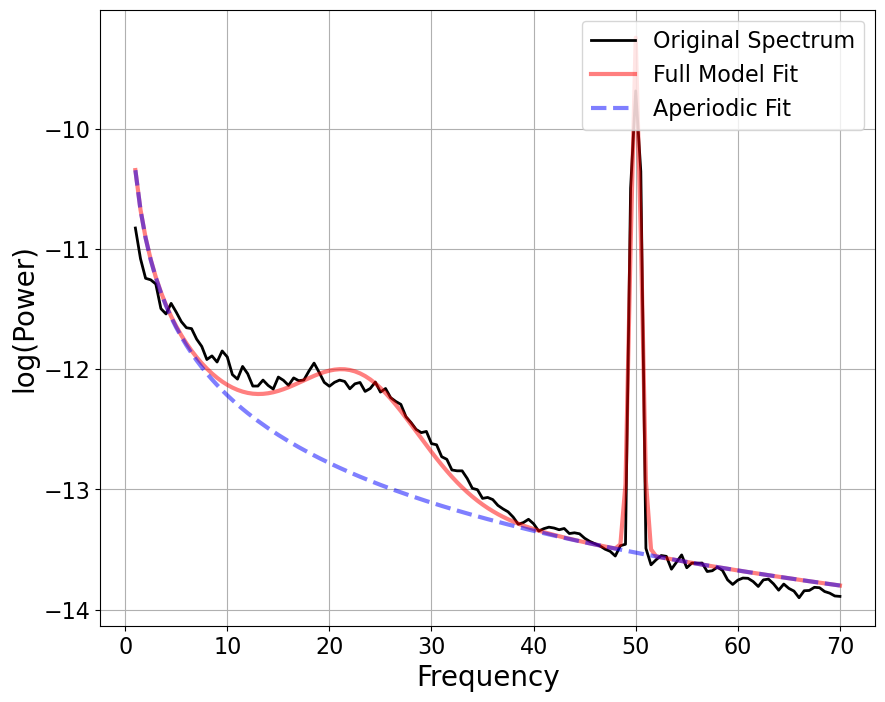

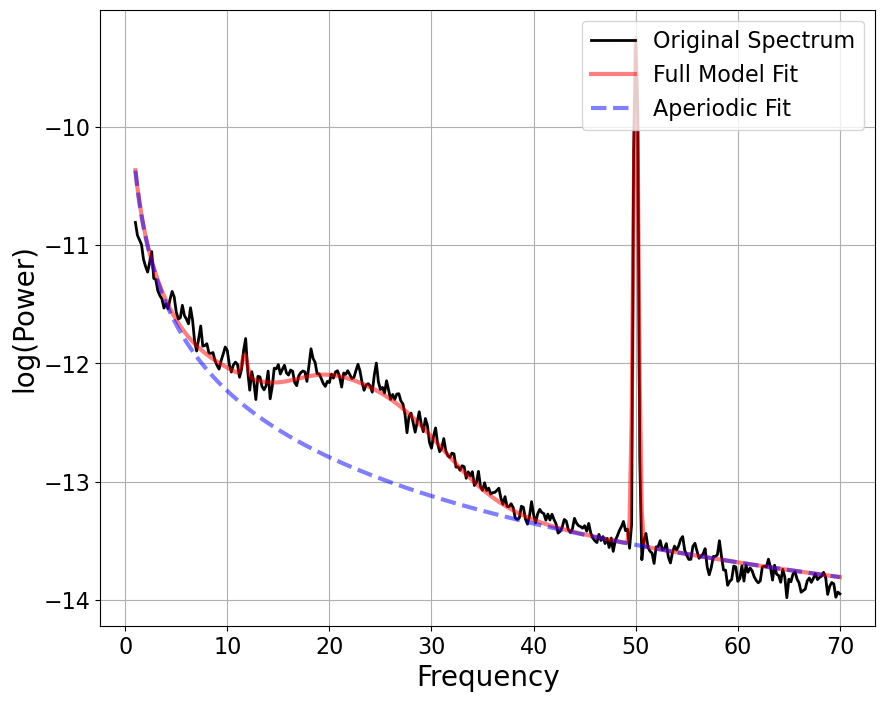

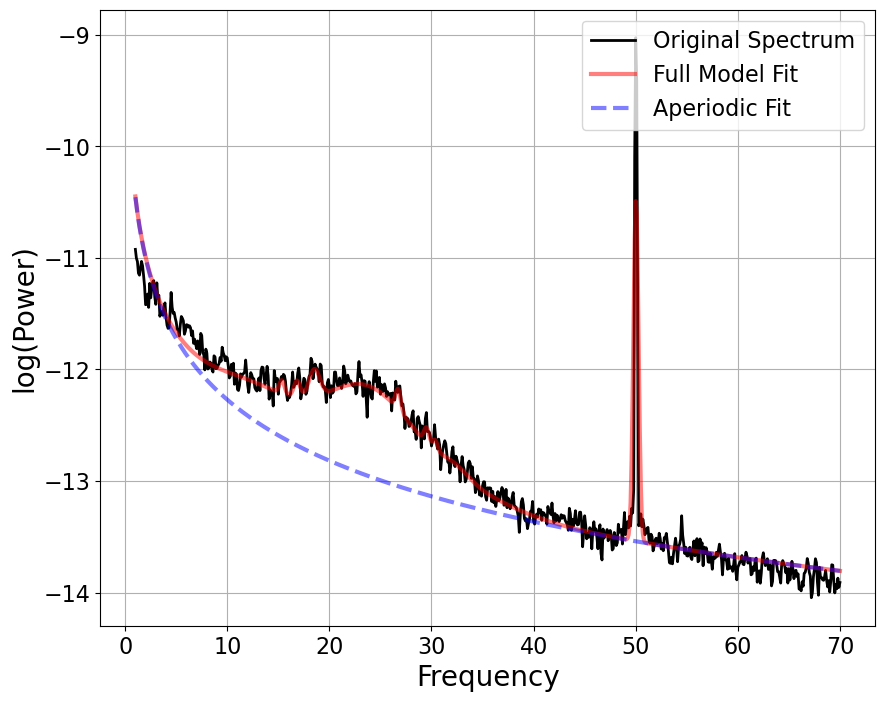

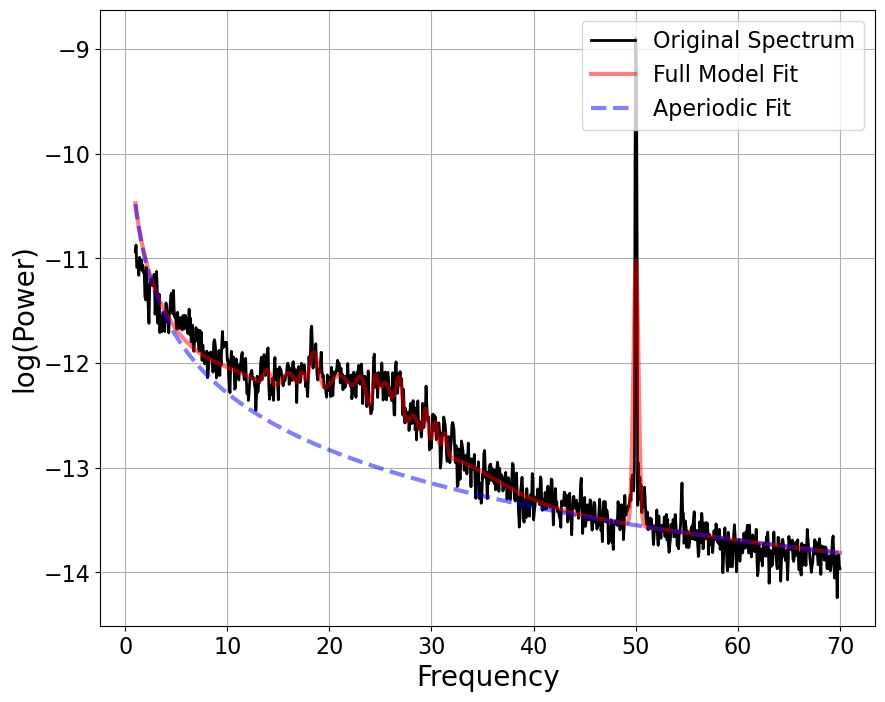

In [100]:
fm = FOOOF()
fm2 = FOOOF()
fm3 = FOOOF()
fm4 = FOOOF()

freq_range = [TF_N2a._freqs[0] , TF_N2a._freqs[-1]]
# Report: fit the model, print the resulting parameters, and plot the reconstruction
X = np.mean(np.squeeze(TF_N2a._data),0)
X2 = np.mean(np.squeeze(TF_N2b._data),0)
X3 = np.mean(np.squeeze(TF_N2c._data),0)
X4 = np.mean(np.squeeze(TF_N2d._data),0)

fm.report(TF_N2a._freqs, X, freq_range)
fm2.report(TF_N2b._freqs, X2, freq_range)
fm3.report(TF_N2c._freqs, X3, freq_range)
fm4.report(TF_N2d._freqs, X4, freq_range)

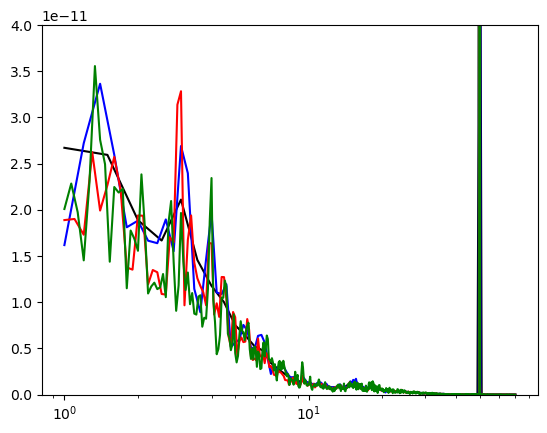

In [103]:
fig, ax = plt.subplots()
ax.plot(TF_N3a._freqs, np.mean(np.squeeze(TF_N3a),0), color = 'black')
ax.plot(TF_N3b._freqs, np.mean(np.squeeze(TF_N3b),0), color = 'blue')
ax.plot(TF_N3c._freqs, np.mean(np.squeeze(TF_N3c),0), color = 'red')
ax.plot(TF_N3d._freqs, np.mean(np.squeeze(TF_N3d),0), color = 'green')
plt.xscale("log")
plt.ylim(0, 0.04e-9)
plt.show()


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 1 - 70 Hz                        
                                 Frequency Resolution is 0.50 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offs

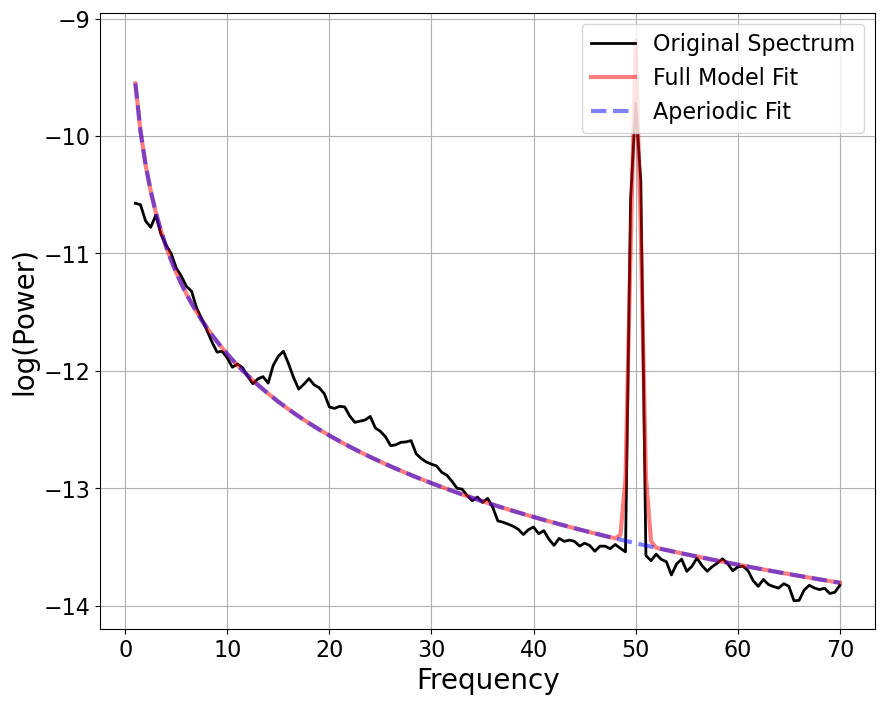

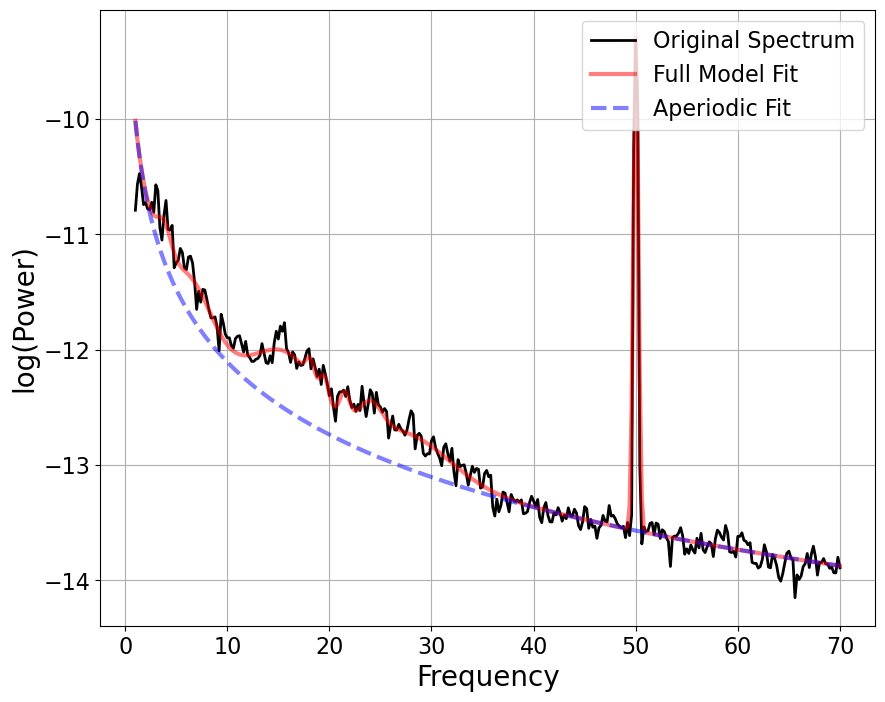

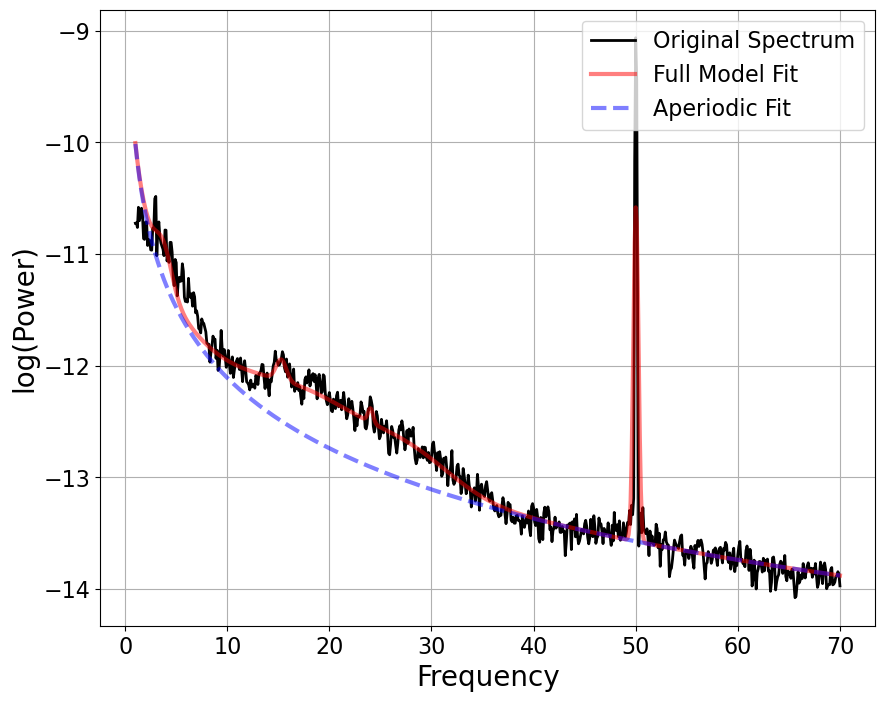

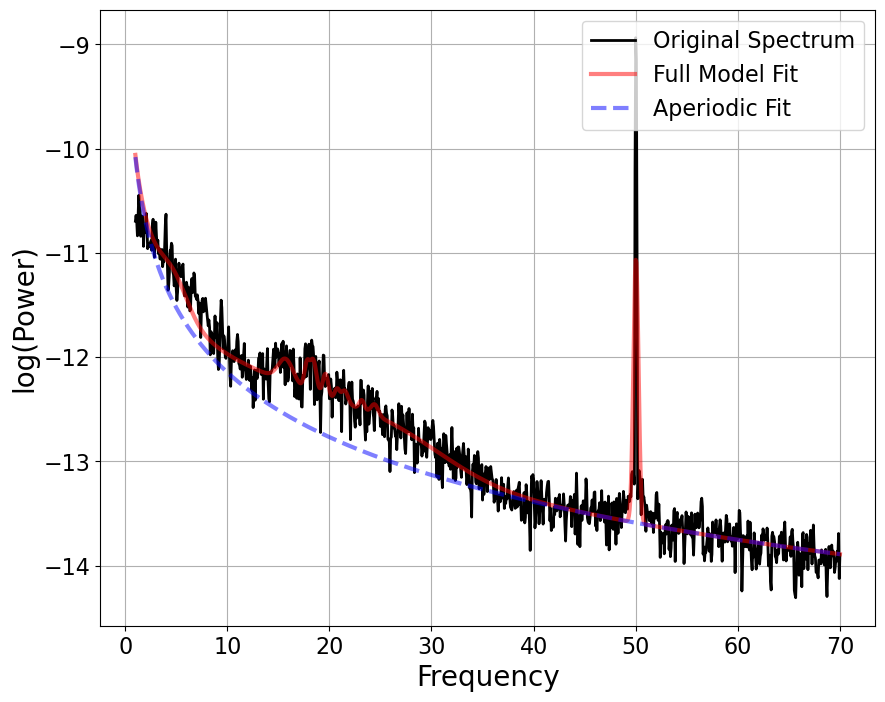

In [104]:
fm = FOOOF()
fm2 = FOOOF()
fm3 = FOOOF()
fm4 = FOOOF()

freq_range = [TF_N3a._freqs[0] , TF_N3a._freqs[-1]]
# Report: fit the model, print the resulting parameters, and plot the reconstruction
X = np.mean(np.squeeze(TF_N3a._data),0)
X2 = np.mean(np.squeeze(TF_N3b._data),0)
X3 = np.mean(np.squeeze(TF_N3c._data),0)
X4 = np.mean(np.squeeze(TF_N3d._data),0)

fm.report(TF_N3a._freqs, X, freq_range)
fm2.report(TF_N3b._freqs, X2, freq_range)
fm3.report(TF_N3c._freqs, X3, freq_range)
fm4.report(TF_N3d._freqs, X4, freq_range)

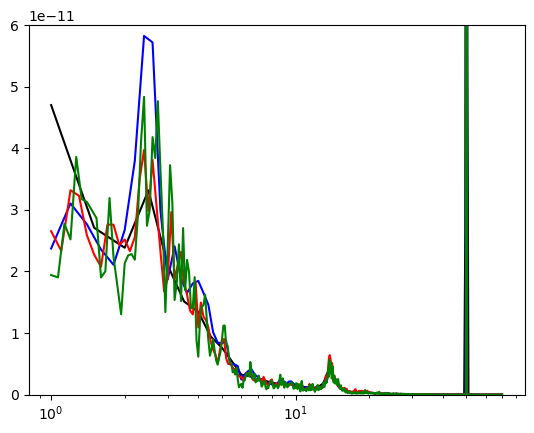

In [108]:
fig, ax = plt.subplots()
ax.plot(TF_Ra._freqs, np.mean(np.squeeze(TF_Ra),0), color = 'black')
ax.plot(TF_Rb._freqs, np.mean(np.squeeze(TF_Rb),0), color = 'blue')
ax.plot(TF_Rc._freqs, np.mean(np.squeeze(TF_Rc),0), color = 'red')
ax.plot(TF_Rd._freqs, np.mean(np.squeeze(TF_Rd),0), color = 'green')
plt.xscale("log")
plt.ylim(0, 0.06e-9)
plt.show()


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 1 - 70 Hz                        
                                 Frequency Resolution is 0.50 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offs

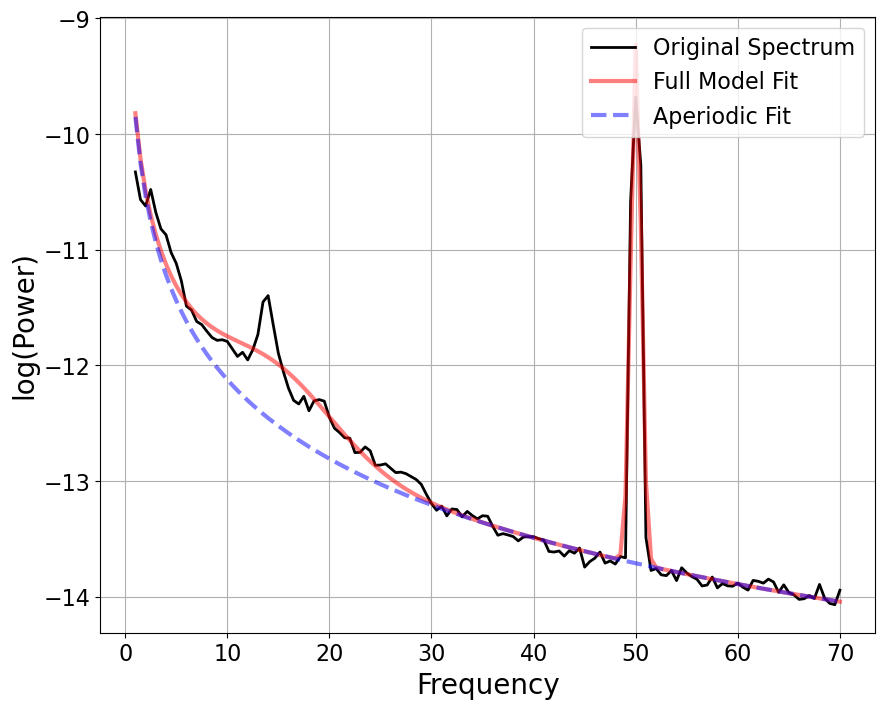

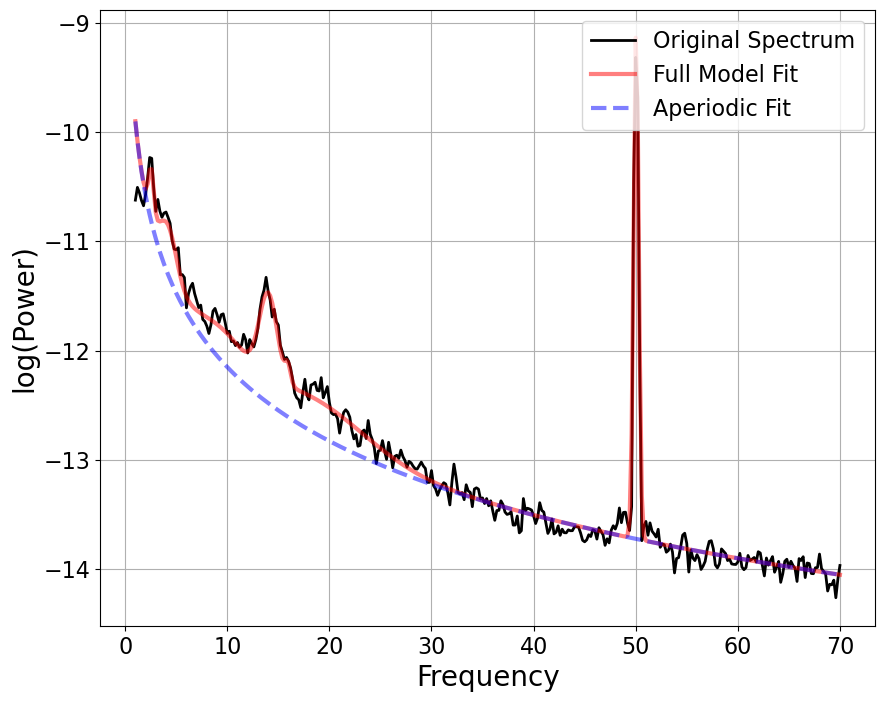

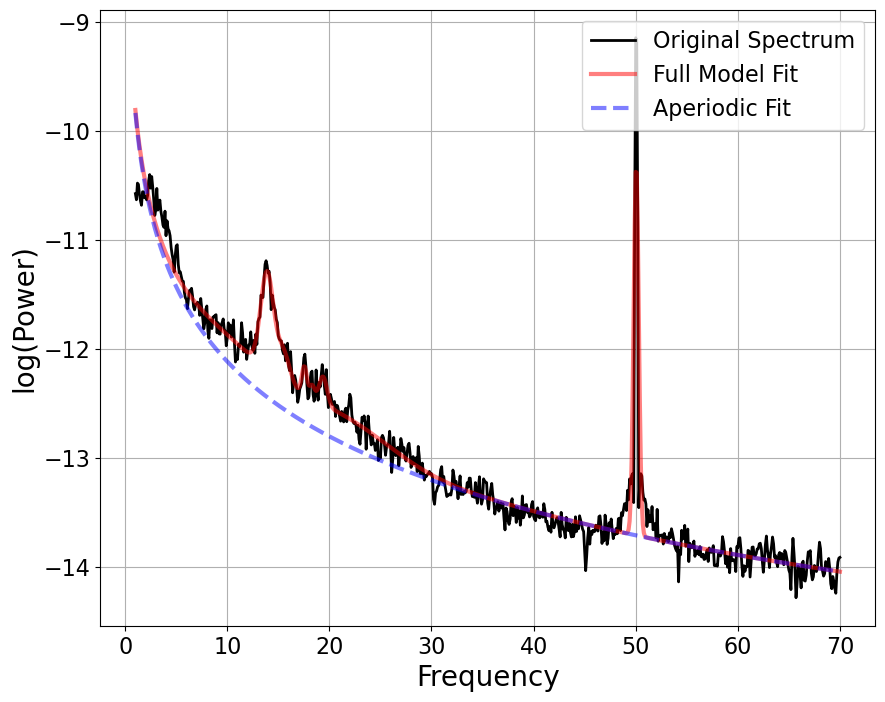

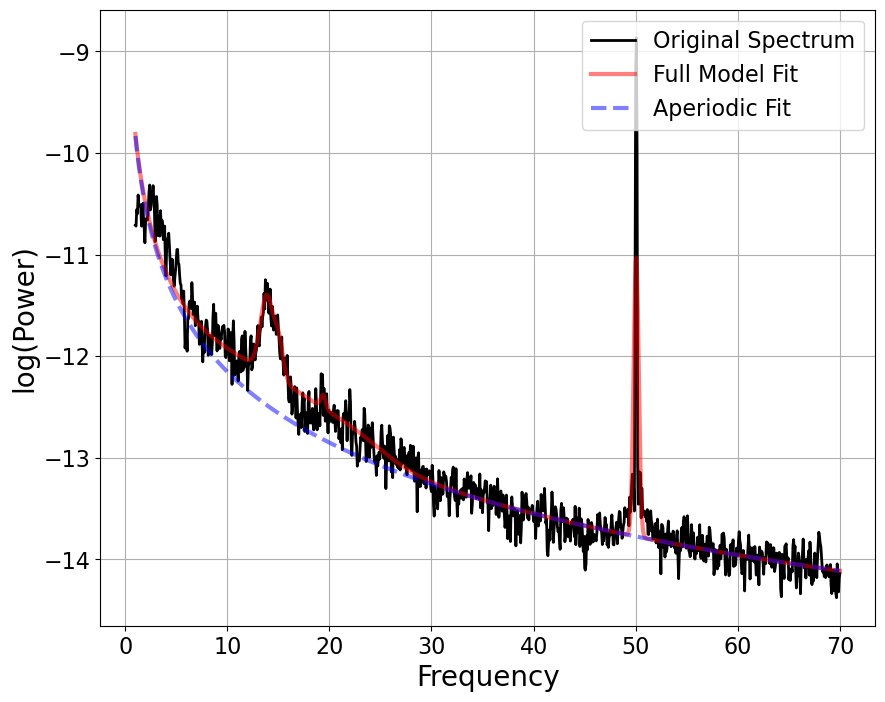

In [109]:
fm = FOOOF()
fm2 = FOOOF()
fm3 = FOOOF()
fm4 = FOOOF()

freq_range = [TF_N3a._freqs[0] , TF_N3a._freqs[-1]]
# Report: fit the model, print the resulting parameters, and plot the reconstruction
X = np.mean(np.squeeze(TF_Ra._data),0)
X2 = np.mean(np.squeeze(TF_Rb._data),0)
X3 = np.mean(np.squeeze(TF_Rc._data),0)
X4 = np.mean(np.squeeze(TF_Rd._data),0)

fm.report(TF_Ra._freqs, X, freq_range)
fm2.report(TF_Rb._freqs, X2, freq_range)
fm3.report(TF_Rc._freqs, X3, freq_range)
fm4.report(TF_Rd._freqs, X4, freq_range)

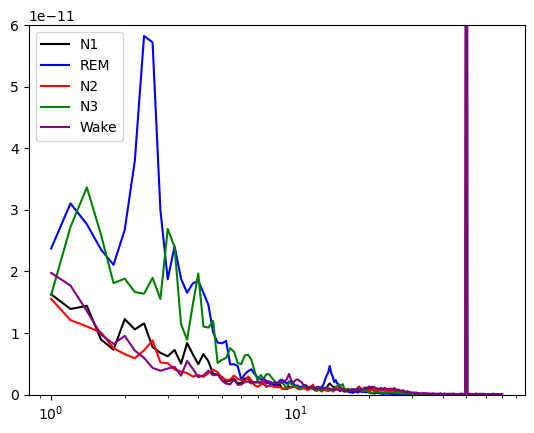

In [117]:
fig, ax = plt.subplots()
x1 = ax.plot(TF_N1b._freqs, np.mean(np.squeeze(TF_N1b),0), color = 'black', label = 'N1')
x2 = ax.plot(TF_Rb._freqs,  np.mean(np.squeeze(TF_Rb),0),  color = 'blue' , label = 'REM')
x3 = ax.plot(TF_N2b._freqs, np.mean(np.squeeze(TF_N2b),0), color = 'red',   label = 'N2')
x4 = ax.plot(TF_N3b._freqs, np.mean(np.squeeze(TF_N3b),0), color = 'green', label = "N3")
x5 = ax.plot(TF_Wb._freqs,  np.mean(np.squeeze(TF_Wb),0),  color = 'purple', label = 'Wake')

plt.legend(['N1','REM','N2','N3','Wake'])
plt.xscale("log")
plt.ylim(0, 0.06e-9)
plt.show()

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 1 - 70 Hz                        
                                 Frequency Resolution is 0.20 Hz                                  
                                                                                                  
                         Aperiodic Parameters (offset, knee, exponent):                           
                                     -9.6754, 34.5879, 1.8879                                     
                                                                                                  
                                       1 peaks were found:                                        
          

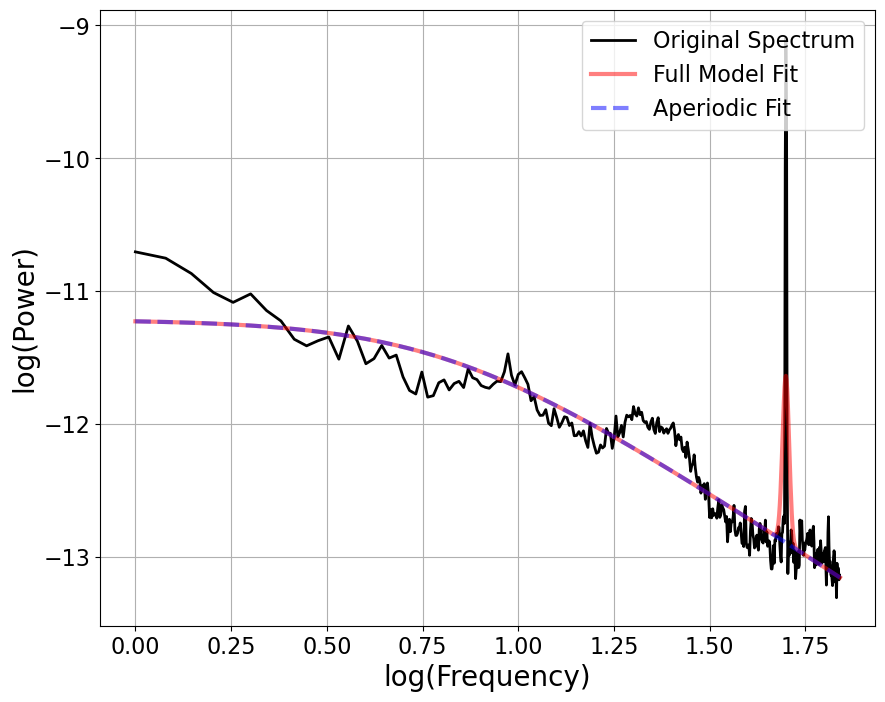

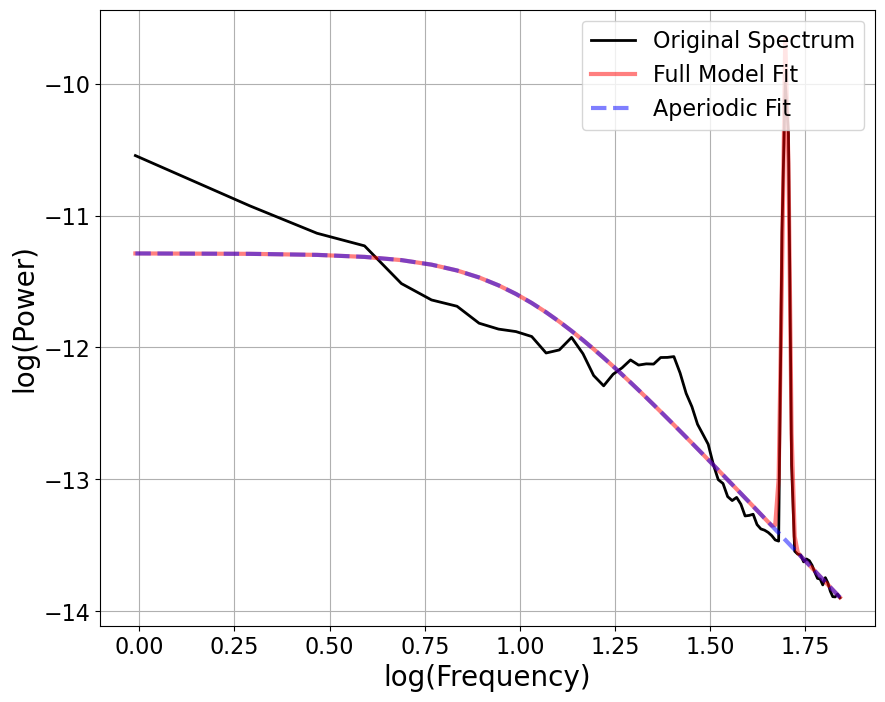

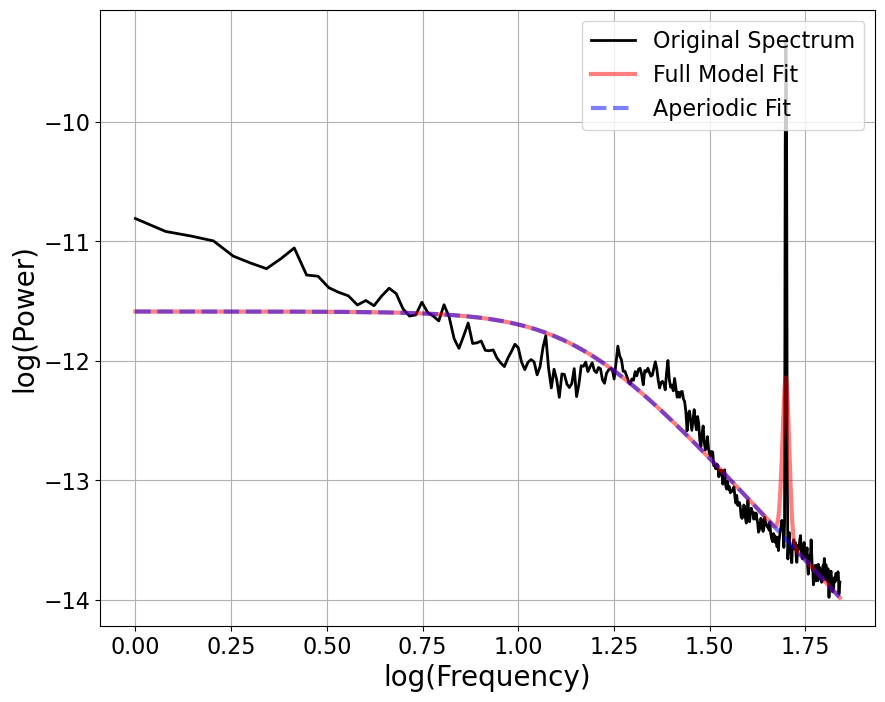

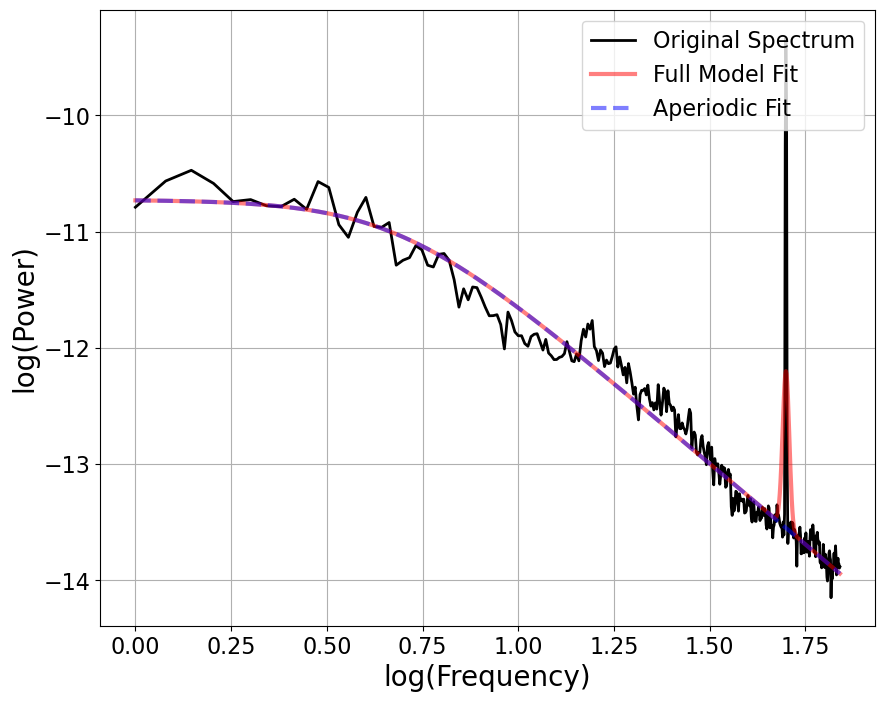

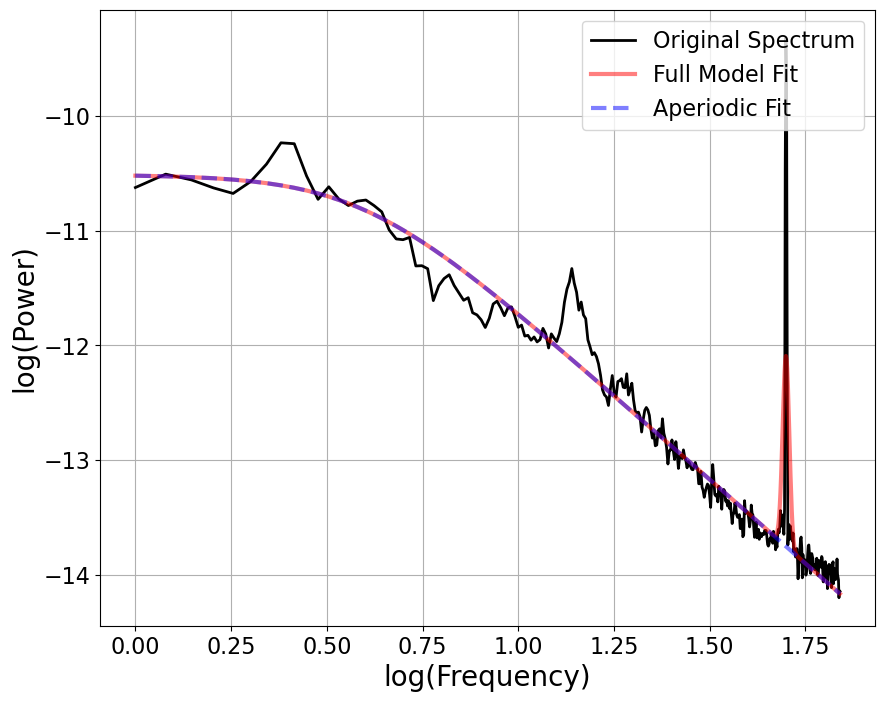

In [124]:
fm1 = FOOOF(peak_width_limits=[2, 8], aperiodic_mode='knee')
fm2 = FOOOF(peak_width_limits=[2, 8], aperiodic_mode='knee')
fm3 = FOOOF(peak_width_limits=[2, 8], aperiodic_mode='knee')
fm4 = FOOOF(peak_width_limits=[2, 8], aperiodic_mode='knee')
fm5 = FOOOF(peak_width_limits=[2, 8], aperiodic_mode='knee')


fm1.report(TF_Wb._freqs,  np.mean(np.squeeze(TF_Wb._data),0), freq_range, plt_log=True)
fm2.report(TF_N1b._freqs,  np.mean(np.squeeze(TF_N1b._data),0), freq_range, plt_log=True)
fm3.report(TF_N2b._freqs, np.mean(np.squeeze(TF_N2b._data),0), freq_range, plt_log=True)
fm4.report(TF_N3b._freqs, np.mean(np.squeeze(TF_N3b._data),0), freq_range, plt_log=True)
fm5.report(TF_Rb._freqs,  np.mean(np.squeeze(TF_Rb._data),0),  freq_range, plt_log=True)


                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 1 - 70 Hz                        
                                 Frequency Resolution is 0.10 Hz                                  
                                                                                                  
                         Aperiodic Parameters (offset, knee, exponent):                           
                                     -10.1863, 2.3277, 1.5681                                     
                                                                                                  
                                       1 peaks were found:                                        
          

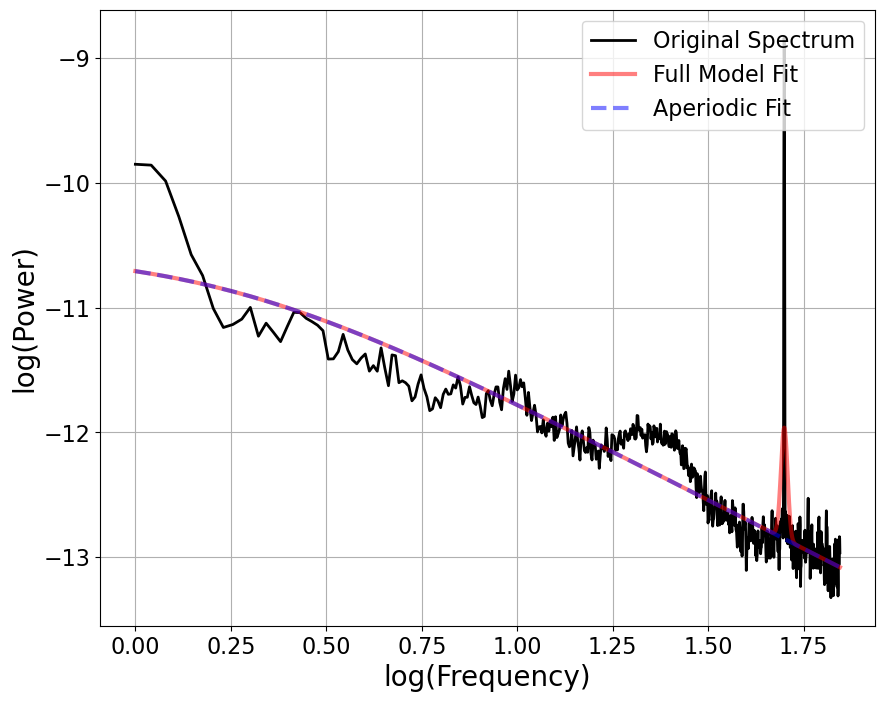

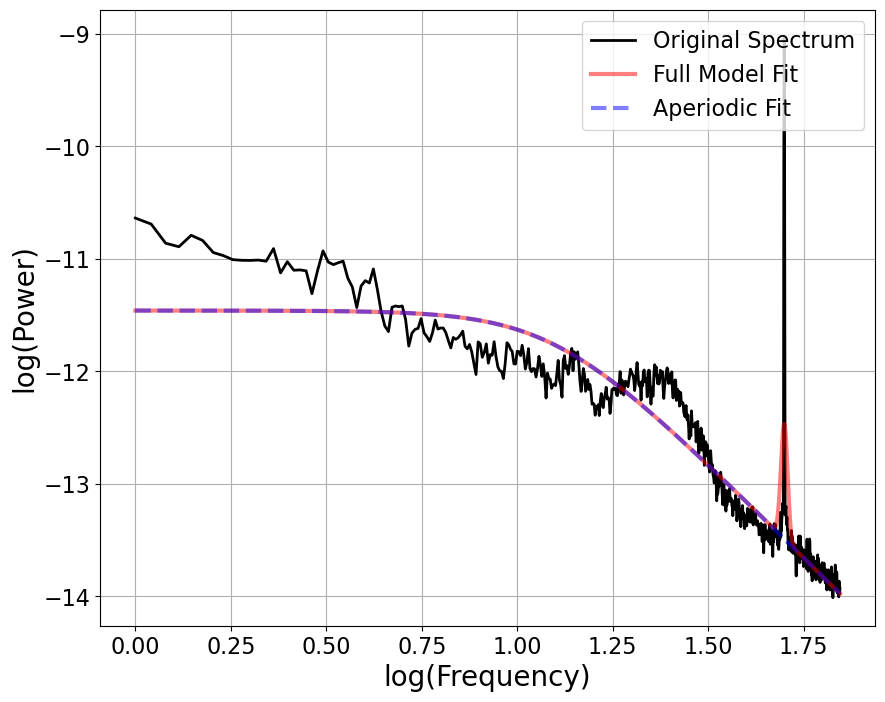

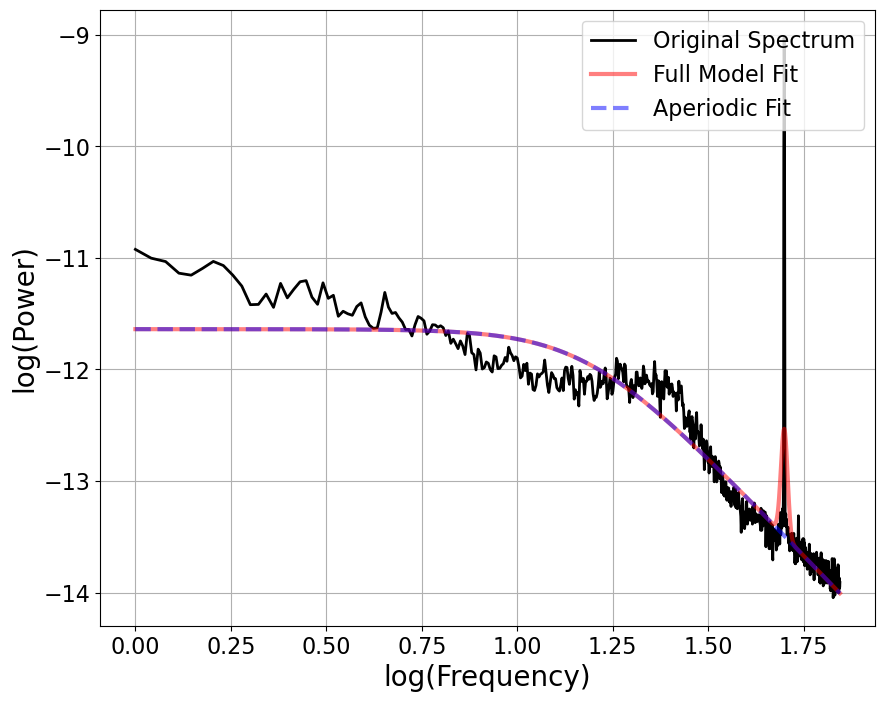

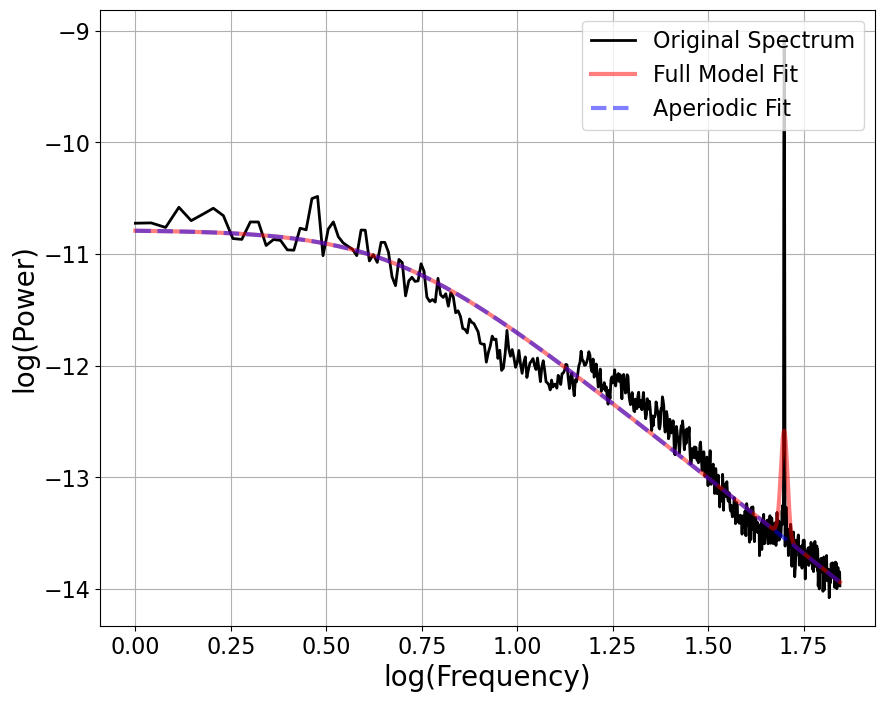

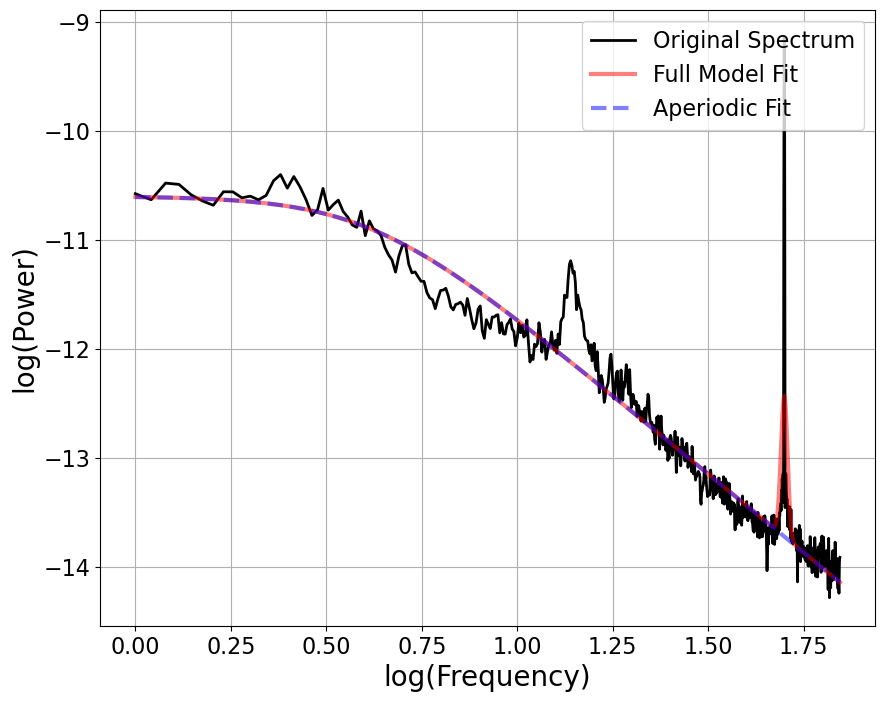

In [119]:
fm1 = FOOOF(peak_width_limits=[2, 8], aperiodic_mode='knee')
fm2 = FOOOF(peak_width_limits=[2, 8], aperiodic_mode='knee')
fm3 = FOOOF(peak_width_limits=[2, 8], aperiodic_mode='knee')
fm4 = FOOOF(peak_width_limits=[2, 8], aperiodic_mode='knee')
fm5 = FOOOF(peak_width_limits=[2, 8], aperiodic_mode='knee')


fm1.report(TF_Wc._freqs,  np.mean(np.squeeze(TF_Wc._data),0), freq_range, plt_log=True)
fm2.report(TF_N1c._freqs,  np.mean(np.squeeze(TF_N1c._data),0), freq_range, plt_log=True)
fm3.report(TF_N2c._freqs, np.mean(np.squeeze(TF_N2c._data),0), freq_range, plt_log=True)
fm4.report(TF_N3c._freqs, np.mean(np.squeeze(TF_N3c._data),0), freq_range, plt_log=True)
fm5.report(TF_Rc._freqs,  np.mean(np.squeeze(TF_Rc._data),0),  freq_range, plt_log=True)
